# Final Report: Predicting Customer Response to Marketing Campaigns
### Group 3: Helena Sokolovska, Alec Neme, Senlin Sun, Benjamin Huo
### STAT 301 (101)
### Dec 6, 2025

In [3]:
# install.packages("ggtern")
# install.packages("ggcorrplot")
# install.packages("cowplot")
# install.packages("patchwork")
# install.packages("gridExtra")
# install.packages("png")
# install.packages("grid")
# install.packages("tidyverse")
# install.packages("dplyr")
# install.packages("nnet")
# install.packages("broom")

library(tidyverse)
# library(ggtern)
library(dplyr)
# library(ggcorrplot)
# library(cowplot)
# library(patchwork)
# library(gridExtra)
# library(png)
# library(grid)
# library(nnet)
# library(broom)

# Can we predict whether a customer will accept the company’s next marketing campaign using their demographic, lifestyle, and purchasing characteristics?

# Introduction (Senlin)

Start with relevant background information on the topic to prepare those unfamiliar for the rest of your proposal. Motivate the question you are about to add.

Formulate one broad question for investigation that would require you to incorporate fitting several models in your analysis, using the same response variable and 2 or more covariates. Indicate if the primary goal is inference or prediction. Make sure that the question(s) can be answered with the data available. For example, you won't be able to quantify the "effect of X on Y" or "the influence of X on Y" or "how X affects Y" using the methods learned in class and observational data.

If available, align your question/objectives with the existing literature on the topic. You can add a reference to a scientific publication if available and listed in the References section (not mandatory). 

# Methods and Results

## Data (Helena)

- read the data into R using reproducible code (i.e., from an open source and not a local directory in your server or computer)
- include a citation of its source
- include any information you have about data collection (e.g., observational vs experimental)
- describe the variables as done in your Stage 1 Report.
- if (absolutely) needed, indicate which variables will be pre-selected (or dropped) and provide a clear justification of your selection.
   - If your goal is prediction, you should keep all variables in the analysis and perform variable selection based on model performance.

- The [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data) dataset was provided by Dr. Omar Romero-Hernandez and published by user Akash Patel on Kaggle.
- This is a detailed collection of a company's customer history, with customer demographics, behavior, products purchased, and route (channel) of purchase.
- The observational dataset recorded 29 variables for 2240 customers, though it is not known how this data was sampled or collected.

| Variable                | Description                                                        | Type                 |
| ----------------------- | ------------------------------------------------------------------ | -------------------- |
| **Demographics**        |                                                                    |                      |
| `ID`                    | Customer's unique identifier                                       | Numeric              |
| `Year_Birth`            | Customer's birth year                                              | Numeric: Temporal    |
| `Education`             | Customer's education level                                         | Categorical: Ordinal |
| `Marital_Status`        | Customer's marital status                                          | Categorical: Nominal |
| `Income`                | Customer's yearly household income                                 | Numeric              |
| `Kidhome`               | Number of children in customer's household                         | Numeric              |
| `Teenhome`              | Number of teenagers in customer's household                        | Numeric              |
| **Behavior**            |                                                                    |                      |
| `Dt_Customer`           | Date of customer's enrollment with the company                     | Numeric: Temporal    |
| `Recency`               | Number of days since customer's last purchase                      | Numeric              |
| `NumWebVisitsMonth`     | Number of visits to company’s website in the last month            | Numeric              |
| `NumDealsPurchases`<br> | Number of purchases made with a discount                           | Numeric              |
| `AcceptedCmp1`          | 1 if customer accepted the offer in the 1st campaign, 0 otherwise  | Categorical: Binary  |
| `AcceptedCmp2`          | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  | Categorical: Binary  |
| `AcceptedCmp3`          | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  | Categorical: Binary  |
| `AcceptedCmp4`          | 1 if customer accepted the offer in the 4th campaign, 0 otherwise  | Categorical: Binary  |
| `AcceptedCmp5`          | 1 if customer accepted the offer in the 5th campaign, 0 otherwise  | Categorical: Binary  |
| `Response`              | 1 if customer accepted the offer in the last campaign, 0 otherwise | Categorical: Binary  |
| `Complain`              | 1 if the customer complained in the last 2 years, 0 otherwise      | Categorical: Binary  |
| `Z_CostContact`         | Unclear: all observations are 3                                    | Numeric              |
| `Z_Revenue`             | Unclear: all observations are 11                                   | Numeric              |
| **Products**            |                                                                    |                      |
| `MntWines`              | Amount spent on wine in last 2 years                               | Numeric              |
| `MntFruits`             | Amount spent on fruits in last 2 years                             | Numeric              |
| `MntMeatProducts`       | Amount spent on meat in last 2 years                               | Numeric              |
| `MntFishProducts`       | Amount spent on fish in last 2 years                               | Numeric              |
| `MntSweetProducts`      | Amount spent on sweets in last 2 years                             | Numeric              |
| `MntGoldProds`          | Amount spent on gold in last 2 years                               | Numeric              |
| **Channel**             |                                                                    |                      |
| `NumWebPurchases`       | Number of purchases made through the company’s website             | Numeric              |
| `NumCatalogPurchases`   | Number of purchases made using a catalogue                         | Numeric              |
| `NumStorePurchases`     | Number of purchases made directly in stores                        | Numeric              |

### Pre-Selection of Variables

In [18]:
customers <- read_tsv("http://raw.githubusercontent.com/hesoru/STAT_301_Group_3/refs/heads/main/marketing_campaign.csv")
head(customers)

Rows: 2240 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Education, Marital_Status, Dt_Customer
dbl (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntF...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID   Year_Birth Education  Marital_Status Income Kidhome Teenhome Dt_Customer
1 5524 1957       Graduation Single         58138  0       0        04-09-2012 
2 2174 1954       Graduation Single         46344  1       1        08-03-2014 
3 4141 1965       Graduation Together       71613  0       0        21-08-2013 
4 6182 1984       Graduation Together       26646  1       0        10-02-2014 
5 5324 1981       PhD        Married        58293  1       0        19-01-2014 
6 7446 1967       Master     Together       62513  0       1        09-09-2013 
  Recency MntWines ⋯ NumWebVisitsMonth AcceptedCmp3 AcceptedCmp4 AcceptedCmp5
1 58      635      ⋯ 7                 0            0            0           
2 38       11      ⋯ 5                 0            0            0           
3 26      426      ⋯ 4                 0            0            0           
4 26       11      ⋯ 6                 0            0            0           
5 94      173      ⋯ 5                 0            0            0           
6 16      520      ⋯ 6                 0            0            0           
  AcceptedCmp1 AcceptedCmp2 Complain Z_CostContact Z_Revenue Response
1 0            0            0        3             11        1       
2 0            0            0        3             11        0       
3 0            0            0        3             11        0       
4 0            0            0        3             11        0       
5 0            0            0        3             11        0       
6 0            0            0        3             11        0

In [5]:
sapply(customers, function(x) length(unique(x)))

ID          Year_Birth           Education      Marital_Status 
               2240                  59                   5                   8 
             Income             Kidhome            Teenhome         Dt_Customer 
               1975                   3                   3                 663 
            Recency            MntWines           MntFruits     MntMeatProducts 
                100                 776                 158                 558 
    MntFishProducts    MntSweetProducts        MntGoldProds   NumDealsPurchases 
                182                 177                 213                  15 
    NumWebPurchases NumCatalogPurchases   NumStorePurchases   NumWebVisitsMonth 
                 15                  14                  14                  16 
       AcceptedCmp3        AcceptedCmp4        AcceptedCmp5        AcceptedCmp1 
                  2                   2                   2                   2 
       AcceptedCmp2            Complain       Z_CostContact           Z_Revenue 
                  2                   2                   1                   1 
           Response 
                  2

We can confirm above that all the observations in `Z_CostContact` and `Z_Revenue` are the same value.
- We will remove `Z_CostContact` and `Z_Revenue` from the dataset, since their meaning is not clear and our analysis (above) shows that all observations have the same value.
- We will remove `ID`, since this column is not useful for analysis.

In [6]:
customers <- customers %>%
    select(-Z_CostContact, -Z_Revenue, -ID)

## Exploratory Data Analysis (Helena)

- Clean and wrangle your data into a tidy format (review Tidyverse's style guide Links to an external site.if needed)
- Include 2 effective and creative visualizations 
   - explore the association of some potential explanatory variables with the response (use colours, point types, point size and/or faceting to include more variables)
   - highlight potential problems (e.g., multicollinearity or outliers)
   - You may utilize sub-plots as you did in Stage 1 Report.
   - Use easily readable main/axis/legend titles, appropriately sized and without any underscores.
- Transform some variables if needed and include a clear explanation (e.g. log-transformation may be useful when outliers are present)
- Any summary tables that are relevant to your analysis (e.g., summarize number of observation in groups, indicate if NAs exist)
- Be sure not to print output that takes up a lot of screen space!
Your EDA must be comprehensive with high quality plots.

In [7]:
colSums(is.na(customers))

Year_Birth           Education      Marital_Status              Income 
                  0                   0                   0                  24 
            Kidhome            Teenhome         Dt_Customer             Recency 
                  0                   0                   0                   0 
           MntWines           MntFruits     MntMeatProducts     MntFishProducts 
                  0                   0                   0                   0 
   MntSweetProducts        MntGoldProds   NumDealsPurchases     NumWebPurchases 
                  0                   0                   0                   0 
NumCatalogPurchases   NumStorePurchases   NumWebVisitsMonth        AcceptedCmp3 
                  0                   0                   0                   0 
       AcceptedCmp4        AcceptedCmp5        AcceptedCmp1        AcceptedCmp2 
                  0                   0                   0                   0 
           Complain            Response 
                  0                   0

There are 24 values missing from the `Income` column - we will need to remove these rows.

In [8]:
categoricals = select(customers, c(Education, Marital_Status))
lapply(categoricals, unique)

$Education
[1] "Graduation" "PhD"        "Master"     "Basic"      "2n Cycle"  

$Marital_Status
[1] "Single"   "Together" "Married"  "Divorced" "Widow"    "Alone"    "Absurd"  
[8] "YOLO"

- '2n Cycle' is the European equivalent of a Master's degree, so we will combine the 2 categories.
- 'Alone' and 'Single' are synonymous, so we will combine the 2 categories.
- 'Absurd' and 'YOLO' are "troll" responses, so we will remove these rows.

### Cleaning + Wrangling
Given the observations above, we will make the following changes to wrangle the dataset:
- Remove observations with `N/A` values (24 rows).
- Recode '2n Cycle' to 'Master' in `Education`.
- Recode 'Alone' to 'Single' in `Marital_Status`.
- Calculate current age from `Year_Birth` for better interpretibility.
- Calculate customer tenure in days (as of today) from date of enrollment with company.
- Calculate total customer spending on all products.
- Convert number of purchases via each shopping channel to proportion of purchases made via each shopping channel (to see customer preferences).
- Remove observations with "troll" `Marital_Status` responses ('YOLO' and 'Absurd').
- Rename columns to more readable names for visualizations.

In [54]:
# clean dataset
customers_clean <- customers %>%
    # remove observations with any N/A values
    na.omit() %>%    
           # Education: change "2n Cycle" to "Master"
    mutate(Education = recode(Education, "2n Cycle" = "Master"),
           # Marital_Status: change "Alone" to "Single"
           Marital_Status = recode(Marital_Status, "Alone" = "Single"),
           # calculate current age from "Year_Birth"
           Age_in_2025 = 2025 - Year_Birth,
           # calculating customer tenure (as of today) from date of enrollment with company
           Dt_Customer = as.Date(Dt_Customer, format = "%d-%m-%Y"),
           Tenure_Days_Today = as.numeric(Sys.Date() - Dt_Customer),
           # calculate total spending on all products
           Total_Spending = MntWines + MntFruits + MntMeatProducts +
                            MntFishProducts + MntSweetProducts + MntGoldProds,
           # compute proportion of total purchases
           TotalPurchases = NumWebPurchases + NumCatalogPurchases + NumStorePurchases,
           PropWebPurchases = NumWebPurchases / TotalPurchases,
           PropCatalogPurchases = NumCatalogPurchases / TotalPurchases,
           PropStorePurchases = NumStorePurchases / TotalPurchases,
           # convert categorical and binary variables to factors
           Education = as.factor(Education),
           Marital_Status = as.factor(Marital_Status),
           Complain = as.factor(Complain),
           AcceptedCmp1 = as.factor(AcceptedCmp1),
           AcceptedCmp2 = as.factor(AcceptedCmp2),
           AcceptedCmp3 = as.factor(AcceptedCmp3),
           AcceptedCmp4 = as.factor(AcceptedCmp4),
           AcceptedCmp5 = as.factor(AcceptedCmp5),
           Response = as.factor(Response)) %>%
    # remove observations with "troll" Marital_Status responses
    filter(!Marital_Status %in% c("YOLO", "Absurd")) %>% 
    # rename columns to more readable names for visualizations
    rename(
        Kids_at_Home = Kidhome,
        Teens_at_Home = Teenhome,
        Date_Enrollment = Dt_Customer,
        Num_Web_Visits_Monthly = NumWebVisitsMonth,
        Num_Discount_Purchases = NumDealsPurchases,
        Accepted_Last_Campaign_Offer = Response,
        Complained_Past_2_Years = Complain
    ) %>%
    rename_with(~ gsub("^AcceptedCmp", "Accepted_Campaign_Offer_", .x), starts_with("AcceptedCmp"))

### Visualizations

Warning message:
“Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`).”


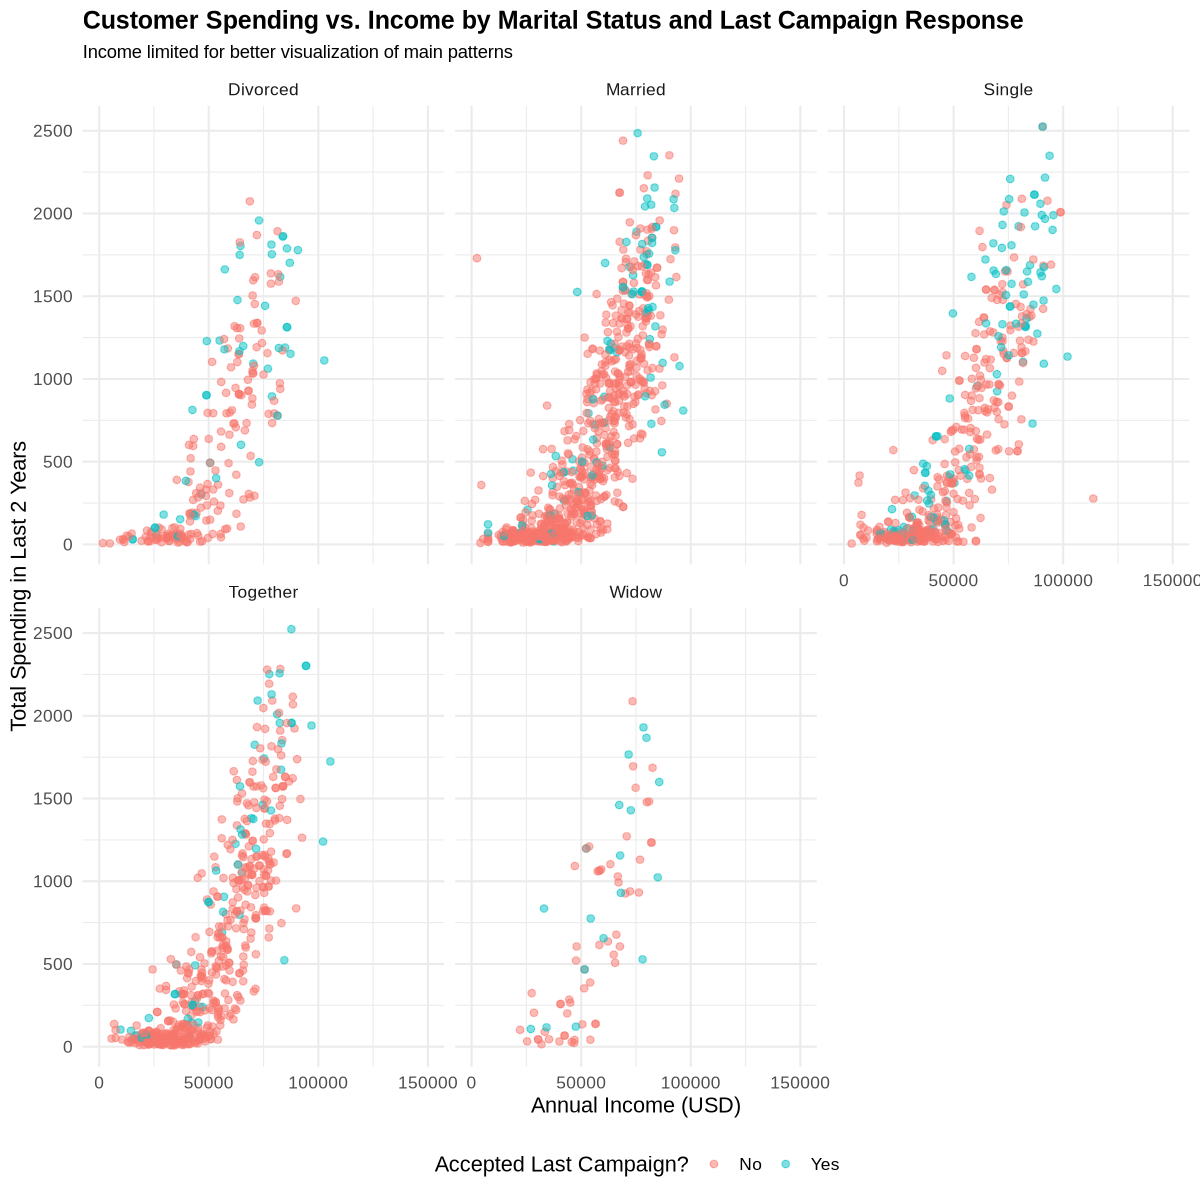

In [50]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(customers_clean,
       aes(x = Income, y = Total_Spending, color = Accepted_Last_Campaign_Offer)) +
  geom_point(alpha = 0.5, size = 1.8) +
  facet_wrap(~ Marital_Status, nrow = 2) +
  scale_color_discrete(labels = c("No", "Yes")) +
  xlim(0, 150000) +  # <-- LIMIT THE X-AXIS (adjust if needed)
  labs(
    title = "Customer Spending vs. Income by Marital Status and Last Campaign Response",
    subtitle = "Income limited for better visualization of main patterns",
    x = "Annual Income (USD)",
    y = "Total Spending in Last 2 Years",
    color = "Accepted Last Campaign?"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", size = 15),
    plot.subtitle = element_text(size = 11),
    legend.position = "bottom"
  )

**Relevance**
- The goal of the analysis is to predict whether a customer will accept the next marketing campaign.
- Marital status, annual income, and total spending in the last 2 years are demographic and behavioral predictors that may be associated with purchasing or decision-making behaviour.

**Interpretation**
- Across several marital groups (particularly married, together, and single), customers who accepted the campaign (Response = 1) tend to show higher overall spending, with moderate to higher income levels.
   - There appears to be a cluster of many single customers with higher than median spending (>$1250) that accepted the last campaign.
- There is no linear pattern within any groups (except possibly the single group), suggesting that interactions between predictors (e.g. between income and marital status) may improve predictive performance.
- There are ~10 outlier customers with especially high incomes (hence the need to bound the x-axis).

**Conclusions**
- Spending behavior and income appear to be meaningful predictors of campaign response, but their effects differ across marital groups.
   - Considering interaction between variables (marital status, annual income, and total spending) may help improve prediction, as different marital groups show distinct response patterns.
- This early exploration helps guide which predictors to keep when building a logistic regression model.

Warning message:
“Removed 18 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 18 rows containing missing values or values outside the scale range
(`geom_point()`).”


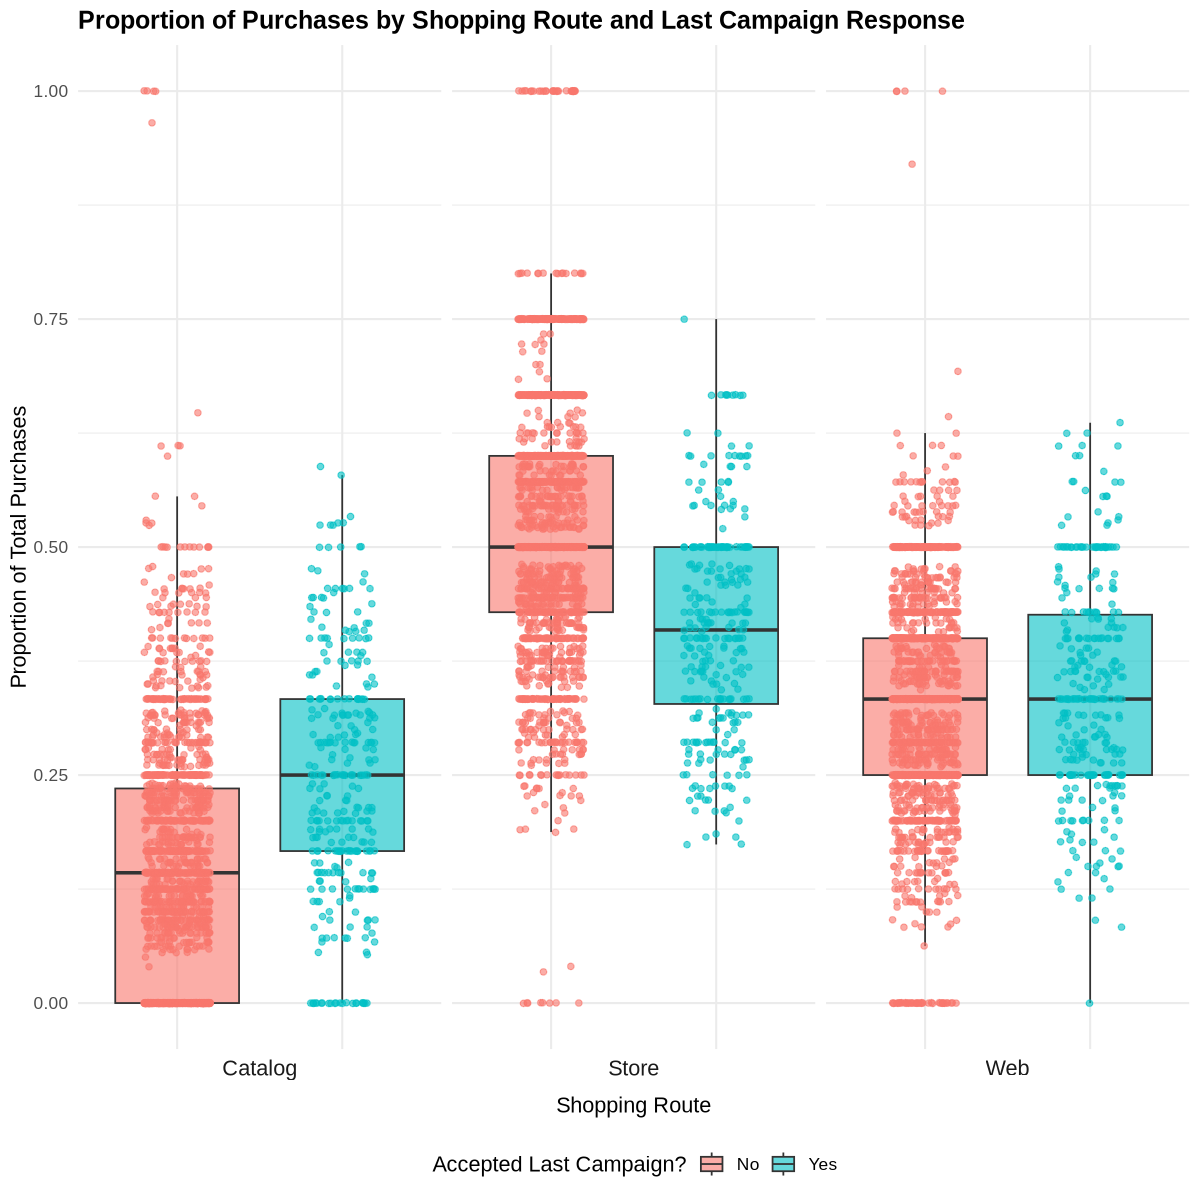

In [75]:
# gather purchases via each channel into long format
customers_long <- customers_clean %>%
  select(Accepted_Last_Campaign_Offer, PropWebPurchases, PropCatalogPurchases, PropStorePurchases) %>%
  pivot_longer(
    cols = -Accepted_Last_Campaign_Offer,
    names_to = "Channel",
    values_to = "Prop_Purchases"
  )

channel_labels <- c(
  PropWebPurchases = "Web",
  PropCatalogPurchases = "Catalog",
  PropStorePurchases = "Store"
)

ggplot(customers_long, aes(x = Accepted_Last_Campaign_Offer, y = Prop_Purchases, fill = Accepted_Last_Campaign_Offer)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.6) +
  geom_jitter(aes(color = Accepted_Last_Campaign_Offer), width = 0.2, alpha = 0.6, size = 1.5, show.legend = FALSE) +  
  facet_wrap(~ Channel, nrow = 1, switch = "x", labeller = labeller(Channel = channel_labels)) +
  scale_fill_discrete(labels = c("No", "Yes")) +
  labs(
    title = "Proportion of Purchases by Shopping Route and Last Campaign Response",
    x = "Shopping Route",
    y = "Proportion of Total Purchases",
    fill = "Accepted Last Campaign?"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", size = 15),
    axis.text.x = element_blank(),
    strip.text = element_text(size = 13),
    legend.position = "bottom",
  )

**Relevance**
- The goal of the analysis is to predict whether a customer will accept the next marketing campaign.
- A customer's activity (proportion of purchases) via each shopping route is a behavioral predictor that may be associated with purchasing or decision-making behaviour.

**Interpretation**
- It appears that customers that accepted the last marketing campaign are associated with a higher median proportion of catalog purchases, lower median proportion of store purchases, and approximately the same median proportion of web purchases as customers that did not accept the last marketing campaign.
- Customers appear to make the largest median proportion of purchases via store, then web, and lastly catalog.
- The distributions of purchase proportions are fairly symmetric for all groups except for the catalog proportions among customers that did not accept the last campaign: this distribution is right-skewed.
- Fewer customers accepted than did not accept the last campaign, but a large enough proportion of the dataset that we can likely predict this variable.
- There are quite a few outlier customers that made all their purchases via store (proportion = 1) and did not accept the last campaign.

**Conclusions**
- A customer's activity (proportion of purchases) via catalog and store appear to be meaningful predictors of campaign response.
- This early exploration helps guide which predictors to keep when building a logistic regression model.

## Methods: Plan (Alec)

- Describe in written English the methods/models you used to perform your analysis from beginning to end.
- Provide a detailed justification of the method(s) used. The analysis must be based on methods learned in class.
   - Make sure that the analysis responded the question posed and that the proposed method is appropriate for the characteristics of the data.
- If a variable selection method is used, you need to describe and justify the method. Furthermore, explain what data will be used, and how final model will be chosen.
- Include a careful model assessment plan relevant to your goal (i.e. diagnostics and/or evaluation, however appropriate), with justifications.

## Code and Results (Alec)

- all the analysis code, from reading the data to visualizing results, must be based on clean, reproducible (e.g. read from an open source and not a local directory in your server or computer), and well-commented code.
- Include no more than 3 visualizations and/or tables to summarize and highlight your results. Ensure your tables and/or figures are labelled with a figure/table number and readable fonts.
   - You may utilize sub-plots as you did in Stage 1 Report.
   - Use easily readable main/axis/legend titles, appropriately sized and without any underscores.
- Make sure to interpret/explain the results you obtain. It’s not enough to just say, “I fitted a linear model with these covariates, and my R-square is 0.87”.
   - If inference is the aim of your project, a detailed interpretation of your fitted models will be required, as well as a discussion of relevant quantities.
      - For example, which coefficient(s) is(are) statistically significant? What are some hypothesis tests of interest? Interpretation of coefficients, how does the model fit the data? among other points.
      - Also explain briefly the key differences between your fitted models.
   - If prediction is the aim, you must highlight the key outcomes from your model fitting/selection/prediction in written English.

# Discussion (Ben)

In this section, you’ll interpret and reflect on the results you obtained in the previous section with respect to the main question/goal of your project.

- Summarize what you found and the implications/impact of your findings
- If relevant, discuss whether your results were what you expected to find
- Discuss how your model could be improved
- Discuss future questions/research this study could lead to

# References (APA)

Include any citation of literature relevant to the project. The citation format is your choice – just be consistent. Make sure to cite the source of your data as well.

Romero-Hernandez, O. (2021). Customer Personality Analysis [Dataset]. (A. Patel, Ed.). Kaggle.